## Data Analysis for Feature Determination


### Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.linear_model import LogisticRegression
import os
import difflib
import math
import re

### Define the year to get the modeling file and run all cells

In [7]:
year_to_do_data_analysis_for = "2015"
path_for_modeling_csv = '/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Data_Science_For_Mechanical_Systems/ModelingCSVs/modeling_'+str(year_to_do_data_analysis_for)+'.csv'

### Load Pandas data frame of data for defined year and drop unnecessary column

In [8]:
df_modeling = pd.read_csv(path_for_modeling_csv,index_col=None)
df_modeling = df_modeling.drop('Unnamed: 0',axis=1)

## Begin data analysis


We are using the following figures to analyze some potential features from our dataset. The figures for the features below were either features that we intuitively thought would be important based on our prior knowledge, or features that appeared highly correlated to getting a hit in our heat map. 

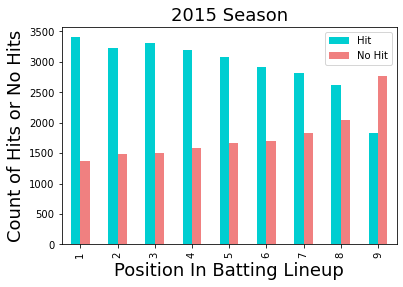

<Figure size 1440x1440 with 0 Axes>

In [13]:
df_modeling.groupby('Position_In_Lineup').agg('sum')[['Hit', 'No_Hit']].plot(kind='bar', stacked=False, color=("darkturquoise","lightcoral"));
plt.xlabel("Position In Batting Lineup",fontsize=18);
plt.ylabel("Count of Hits or No Hits",fontsize=18);
plt.title(year_to_do_data_analysis_for + ' Season',fontsize=18);
plt.legend(['Hit', 'No Hit']);
plt.savefig('/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Final_Project_Figures/count_num_hit.jpg',dpi=100,bbox_inches='tight')
plt.figure(figsize=(20, 20));

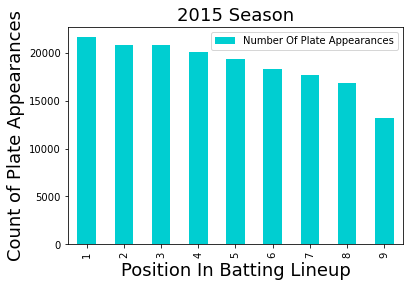

<Figure size 1440x1440 with 0 Axes>

In [21]:
df_modeling.groupby('Position_In_Lineup').agg('sum')[['Number_Of_Plate_Appearances']].plot(kind='bar', stacked=False, color=("darkturquoise","lightcoral"));
plt.xlabel("Position In Batting Lineup",fontsize=18);
plt.ylabel("Count of Plate Appearances",fontsize=18);
plt.title(year_to_do_data_analysis_for + ' Season',fontsize=18);
plt.legend(['Number Of Plate Appearances']);


plt.savefig('/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Final_Project_Figures/count_plate_appear.jpg',dpi=100,bbox_inches='tight')


plt.figure(figsize=(20, 20));

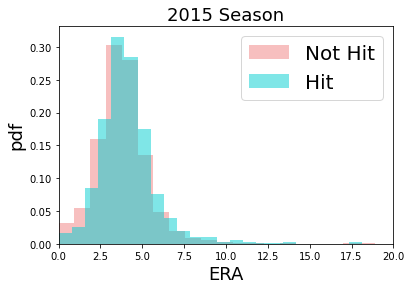

In [24]:
era_no_hit = df_modeling[df_modeling['Hit'] == 0]['ERA']
era_hit = df_modeling[df_modeling['Hit'] == 1]['ERA']


plt.hist(era_no_hit,bins=100, alpha=.5,color='lightcoral',density=True);
plt.hist(era_hit,bins=120, alpha=.5,color='darkturquoise',density=True);
plt.xlim(0,20)
plt.xlabel("ERA",fontsize=18)
plt.title(year_to_do_data_analysis_for + ' Season',fontsize=18);
plt.ylabel("pdf",fontsize=18)
plt.legend(['Not Hit', 'Hit'], prop={'size': 20});
plt.savefig('/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Final_Project_Figures/ERA.jpg',dpi=100,bbox_inches='tight')



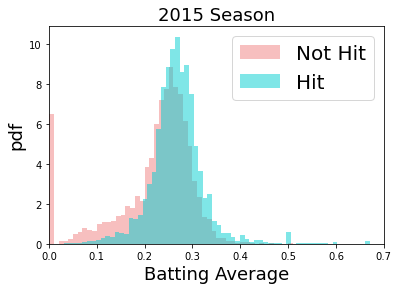

In [16]:
batting_average_no_hit = df_modeling[df_modeling['Hit'] == 0]['Batting_Average']
batting_average_hit = df_modeling[df_modeling['Hit'] == 1]['Batting_Average']


plt.hist(batting_average_no_hit,bins=100, alpha=.5,color='lightcoral',density=True);
plt.hist(batting_average_hit,bins=100, alpha=.5,color='darkturquoise',density=True);
plt.xlim(0,.7)
plt.xlabel("Batting Average",fontsize=18)
plt.title(year_to_do_data_analysis_for + ' Season',fontsize=18);
plt.ylabel("pdf",fontsize=18)
plt.legend(['Not Hit', 'Hit'], prop={'size': 20});
plt.savefig('/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Final_Project_Figures/batting_average.jpg',dpi=100,bbox_inches='tight')



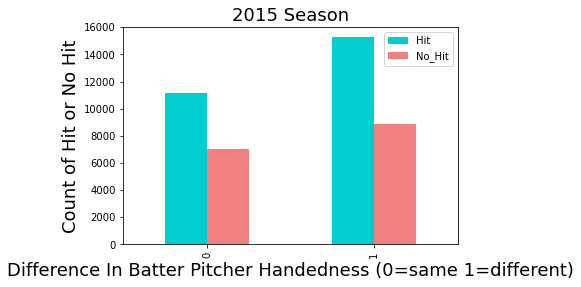

In [25]:
df_modeling.groupby('Difference_Batter_And_Pitcher').agg('sum')[['Hit', 'No_Hit']].plot(kind='bar', stacked=False, color=("darkturquoise","lightcoral"));
plt.xlabel("Difference In Batter Pitcher Handedness (0=same 1=different)",fontsize=18);
plt.ylabel("Count of Hit or No Hit",fontsize=18);
plt.title(year_to_do_data_analysis_for + ' Season',fontsize=18);
labels = ['Same Handedness', 'Different Handedness']
plt.savefig('/Users/carlylagrotta/Dropbox/Columbia/Fall_2020_Semester/Data_Science/Final_Project_Figures/batter_hand.jpg',dpi=100,bbox_inches='tight')



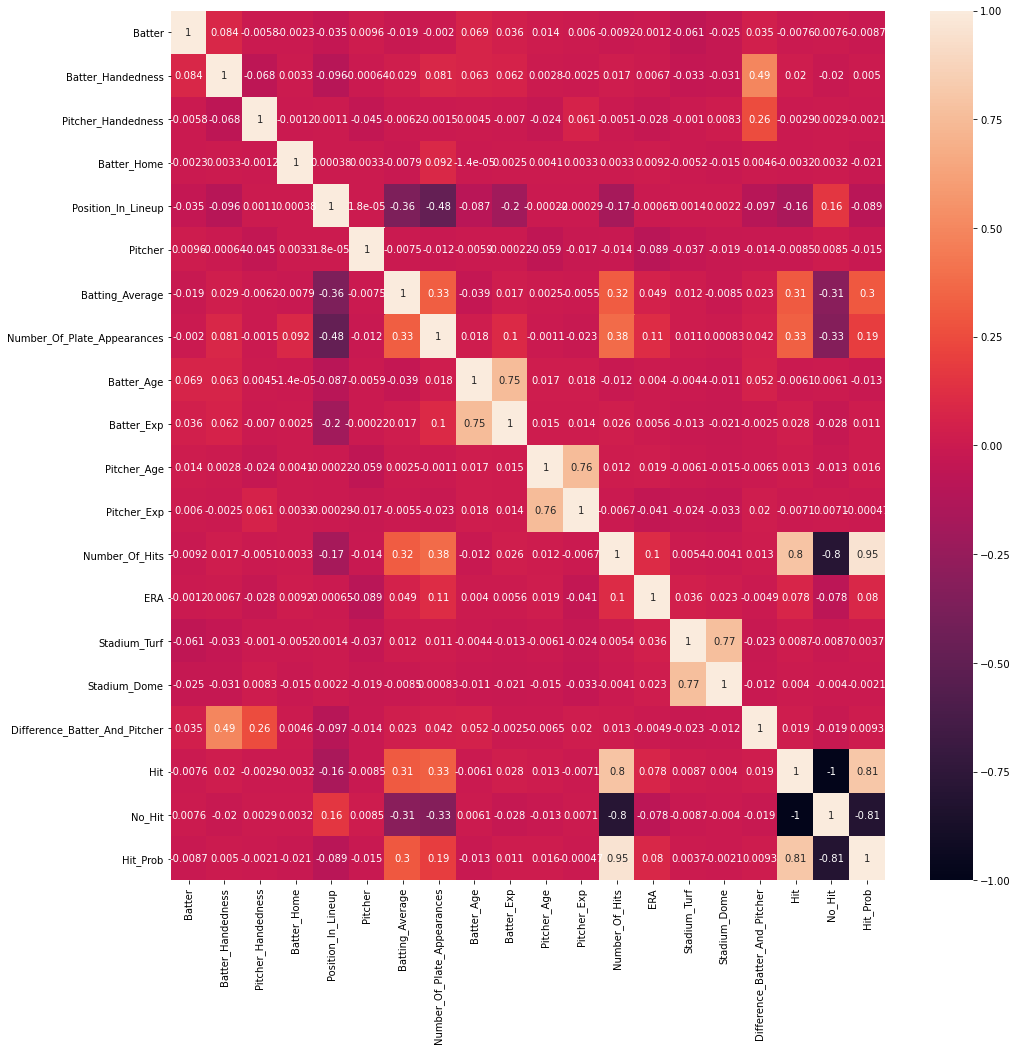

In [475]:
df_modeling.describe()
corr = df_modeling.corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr, annot=True)

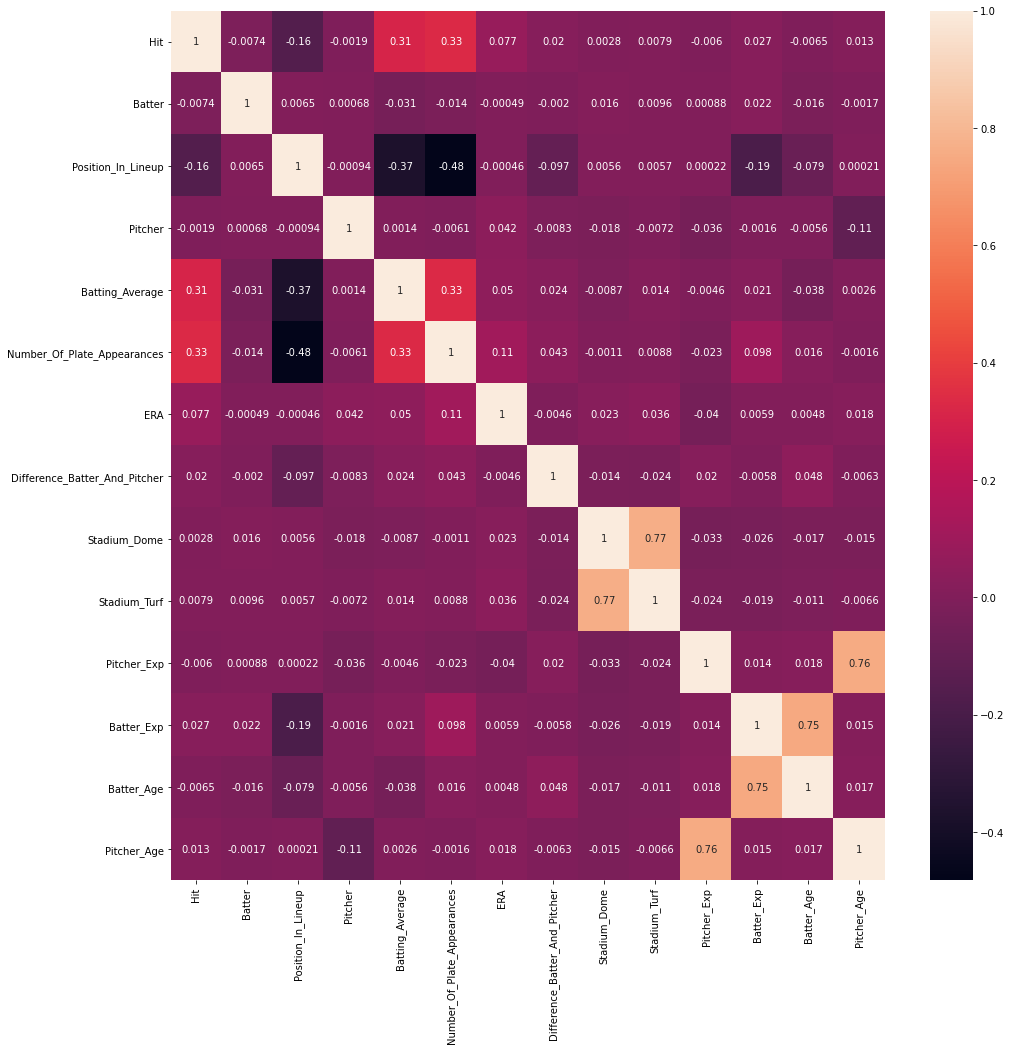

In [26]:
df_modeling.describe()
corr = df_modeling[['Hit','Batter','Position_In_Lineup','Pitcher','Batting_Average','Number_Of_Plate_Appearances','ERA','Difference_Batter_And_Pitcher','Stadium_Dome','Stadium_Turf','Pitcher_Exp','Batter_Exp','Batter_Age','Pitcher_Age']].corr()
plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr, annot=True)
